In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
image_ref = Image.open('./test.png').convert('RGB')
l = []
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
scores_6 = []
i = 0

for img in os.listdir('./datasets/dataset_128/'):
	image = Image.open('./datasets/dataset_128/' + img)

	ref_np_4 = np.array(image_ref.resize((4, 4), Image.Resampling.BILINEAR)) / 255.
	ref_np_16 = np.array(image_ref.resize((16, 16), Image.Resampling.BILINEAR)) / 255.
	ref_np_128 = np.array(image_ref) / 255.

	img_np_4 = np.array(image.resize((4, 4), Image.Resampling.BILINEAR)) / 255.
	img_np_16 = np.array(image.resize((16, 16), Image.Resampling.BILINEAR)) / 255.
	img_np_128 = np.array(image) / 255.

	diff_4 = ref_np_4 - img_np_4
	diff_16 = ref_np_16 - img_np_16
	diff_128 = ref_np_128 - img_np_128

	score_1 = np.mean(diff_4 ** 2)
	score_2 = np.mean(diff_16 ** 2)
	score_3 = np.mean(diff_128 ** 2)
	score_4 = np.mean(np.abs(diff_4))
	score_5 = np.mean(np.abs(diff_16))
	score_6 = np.mean(np.abs(diff_128))

	scores_1.append(score_1)
	scores_2.append(score_2)
	scores_3.append(score_3)
	scores_4.append(score_4)
	scores_5.append(score_5)
	scores_6.append(score_6)
	l.append(['./datasets/dataset_128/' + img, 0.])
	i += 1
	print(i, end = '\r')

scores_1 = np.array(scores_1)
scores_2 = np.array(scores_2)
scores_3 = np.array(scores_3)
scores_4 = np.array(scores_4)
scores_5 = np.array(scores_5)
scores_6 = np.array(scores_6)

mean_score_1 = np.mean(scores_1)
mean_score_2 = np.mean(scores_2)
mean_score_3 = np.mean(scores_3)
mean_score_4 = np.mean(scores_4)
mean_score_5 = np.mean(scores_5)
mean_score_6 = np.mean(scores_6)

scores_2 *= mean_score_1 / mean_score_2
scores_3 *= mean_score_1 / mean_score_3
scores_4 *= mean_score_1 / mean_score_4
scores_5 *= mean_score_1 / mean_score_5
scores_6 *= mean_score_1 / mean_score_6

scores = (scores_1 + scores_2 + scores_3 + scores_4 + scores_5 + scores_6) / 6.

for i in range(len(l)):
	l[i][1] = scores[i]

In [ ]:
l.sort(key = lambda x: x[1])

In [ ]:
# Show the ref image and the 5 most similar images

plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.imshow(image_ref)
plt.title('Reference image')
plt.axis('off')

for i in range(5):
	plt.subplot(1, 6, i+2)
	plt.imshow(Image.open(l[i][0]))
	plt.title('MSE: ' + str(l[i][1]))
	plt.axis('off')

plt.show()

In [ ]:
for i in range(5):
	image = Image.open(l[i][0])
	image.save('./test_' + str(i) + '.png')

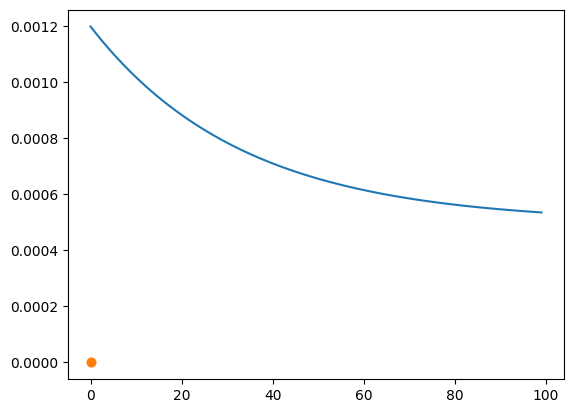

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lr_max = 0.0012
lr_min = 0.0005

def get_lr(epoch):
	return lr_min + (lr_max - lr_min) * np.exp(-epoch * 0.03)

epochs = np.arange(0, 100)
lrs = np.array([get_lr(epoch) for epoch in epochs])

plt.plot(epochs, lrs)
plt.plot([0, 0], [0, 0], 'o')
plt.show()